# Лабораторная работа №2. Дискретные LTI системы.

Лаборатория цифровой обработки сигналов, ФРКТ МФТИ


Дискретные LTI системы (англ. Linear time-invariant system) — линейные стационарные дискретные системы.

Время через БПФ =  0.03870820999145508 c
Время напрямую =  3.7207565307617188 c


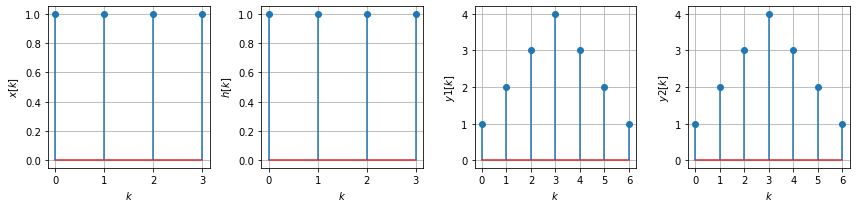

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.signal as signal
import matplotlib.ticker as ticker
import time

M = 4
x = np.ones(M)
h = np.ones(M)
y1 = signal.convolve(x, h)
y2 = np.zeros(2*M - 1)

for t in range(2*M - 1):
    w=h[::-1]
    q=np.zeros(M)
    for i in range(M):
        ind2=(t-np.arange(M)[::-1])
        k=0
        for qq in range(ind2.size):
            if ind2[qq]==i:
                k=1
                break
        q[i]=x[i]*w[qq]*k
    y2[t] = sum(q)


def plot_signal(signal, index, variable):
    ax=plt.subplot(1, 4, index)
    plt.stem(signal)
    plt.xlabel("$k$")
    plt.ylabel("$"+variable+"[k]$")
    ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))
    plt.grid()

plt.figure(figsize=[12, 3])
plot_signal(signal=x, index=1, variable='x')
plot_signal(signal=h, index=2, variable='h')
plot_signal(signal=y1, index=3, variable='y1')
plot_signal(signal=y2, index=4, variable='y2')
plt.tight_layout()

N = 2**17
n0 = 128
x = np.zeros(N)
h = np.zeros(N)
for k in range(N):
    x[k] = np.cos(2*np.pi*k*n0/N)
    h[k] = np.sin(2*np.pi*k*n0/N)
    
start=time.time()
y1 = signal.convolve(x, h, method='fft')
time2=time.time()
print("Время через БПФ = ", time2-start, "c")

start=time.time()
y2 = signal.convolve(x, h, method='direct')
time2=time.time()
print("Время напрямую = ", time2-start, "c")

# if np.array_equal(y1, y2):
#     print("Ok!!!")

# Модуль 1. Линейная дискретная свертка.

## Задача 1.1. Линейная дискретная свертка прямоугольных окон 

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|
|    $M$    | 4 | 5 | 6 | 4 | 5 | 6 |

Вычислить аналитически линейную дискретную свертку двух одинаковых последовательностей $x[k]$ и $h[k]$, таких, что 
$$x[k]=h[k]=\sum_{m=0}^{M-1}\mathbf{1} [k-m], $$ 
где $M$ соответствует варианту, непосредственно воспользовавшись формулой линейной дискретной свертки
$$y[k]=\sum_{m=-\infty}^{\infty} x[m] h[k-m].$$

Проверить результаты с помощью моделирования, воспользовавшись функцией `signal.convolve`

## Задача 1.2. Эффективное вычисление свертки 




| Варианты: |   $1$ |    $2$ |    $3$ |    $4$ |    $5$ |    $6$ | 
|:---------:|:----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|    $N$    | $2^{17}$ | $2^{18}$ | $2^{17}$ | $2^{18}$ | $2^{17}$ | $2^{18}$ |
|$n_0$| $128$ | $32$ | $256$ | $64$ | $512$ | $1024$ |

Даны последовательности отсчетов
$$ x[k]= \cos(2\pi kn_0/N)$$  
$$ h[k]= \sin(2\pi kn_0/N)$$  
где $n_0$, $N$ взять из таблицы сверху в соответствии с вариантом и $k$ пробегает значения от $0$ до $N-1.$  
Вычислить их линейную дискретную свертку c помощью `signal.convolve()` двумя способами: с помощью прямого вычисления по формуле свёртки и с использованием алгоритма БПФ.  
Сравнить вычислительную эффективность, сделать вывод. 

P.S. На вычисление свертки по формуле может потребоваться значительное колличество времени. 



# Модуль 2. Характеристики LTI систем.






## Задача 2.1. Фильтр скользящего среднего

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|
|$M_1$|  9 | 14 | 13 |  9 | 12 |  11 |
|$M_2$| 29 | 50 | 40 | 24 | 50 |  45 |
| $K$ | 35 | 63 | 57 | 35 | 63 |  55 |
| $N$ |100 |140 |130 |100 |140 | 115 |

Рассмотрите фильтр скользящего среднего

$$y[k]=\dfrac{1}{M}\sum_{m=0}^{M-1} x[k-m]$$

для $M = M_1$ и $M = M_2$ (из таблицы): 

* Определите и изобразите импульсную характеристику $h[k]$ фильтра.

* Вычислите с помощью `signal.convolve` отклик $y[k]$ фильтра на входное воздействие вида
$$ x_{noise}[k] = \sin(2\pi k / K) + \varepsilon[k], 0\le k\le N-1.$$
где $K,\;N$ — соответствующие числа из таблицы, $\varepsilon[k]$ — белый гаусовский шум (`np.random.normal(mu, sigma, N)`) с нулевым среднем `mu=0` и  среднеквадратическим отклонением $\sigma=0.1$ (`sigma=0.1`).  
* Сравните сигналы $x_{noise}[k]$, $y[k]$ и 
$$ x[k] = \sin(2\pi k / K), 0\le k\le N-1.$$
* Определите и изобразите амплитудно-частотную характеристику (АЧХ) $|H(\nu)|$ фильтра. Как выбор $M$ влияет на результат фильтрации отрезка гармонического сигнала?

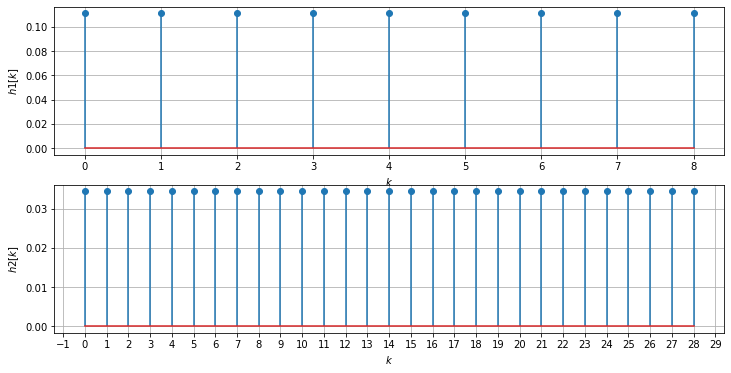

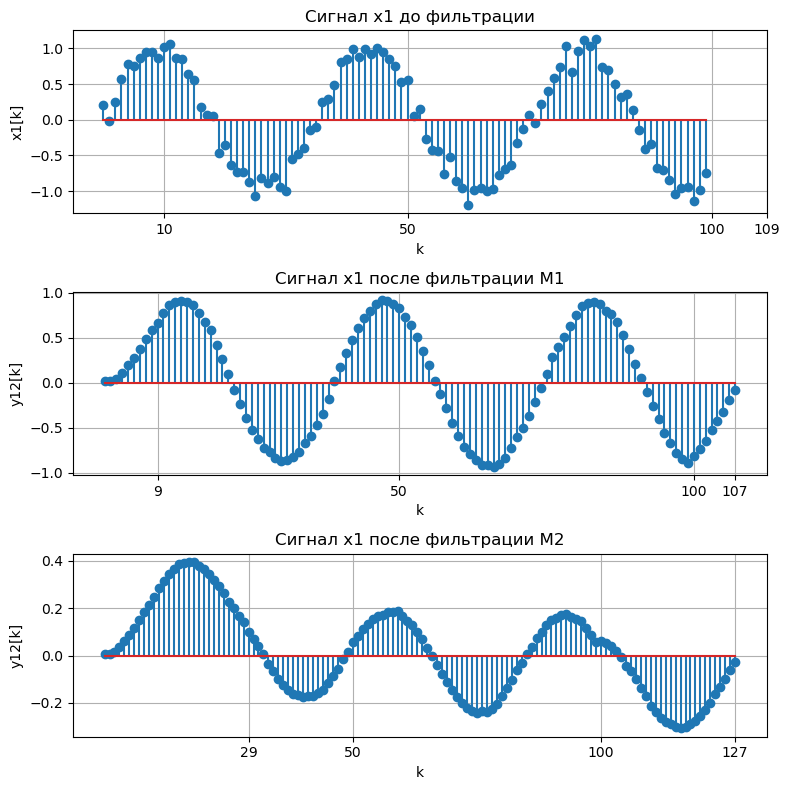

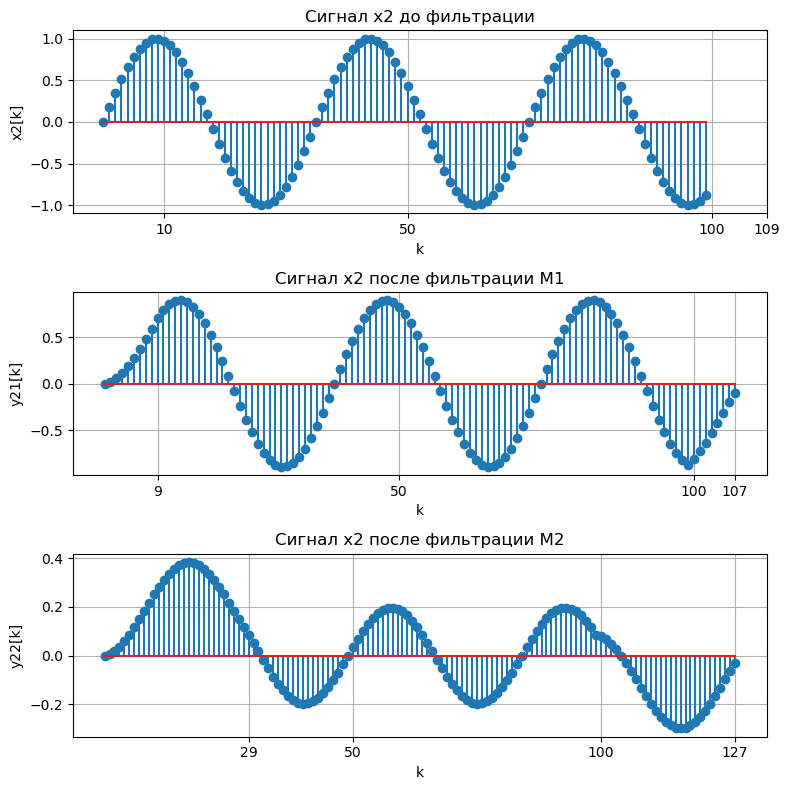

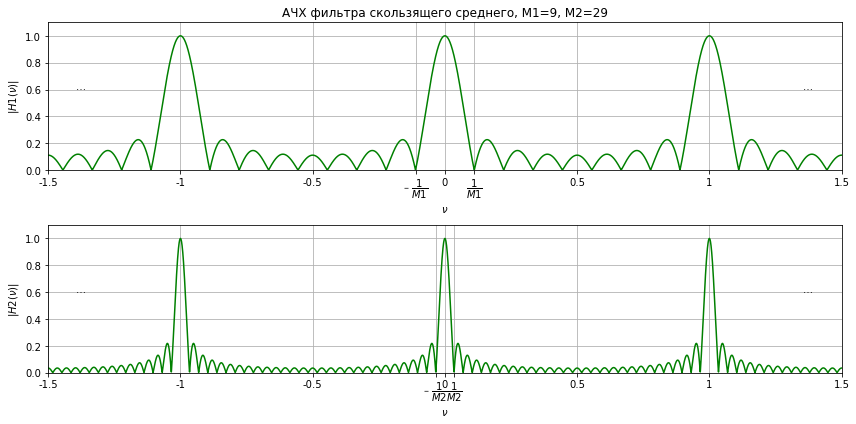

In [2]:
M1 = 9
M2 = 29
K = 35
N = 100

h1 = np.ones(M1)/M1
h2 = np.ones(M2)/M2
k=np.arange(N)
x1 = np.sin(2*np.pi*k/K)+np.random.normal(0, 0.1, N)
x2 = np.sin(2*np.pi*k/K)

def plot_signal(signal, index, variable):
    ax=plt.subplot(2, 1, index)
    plt.stem(signal)
    plt.xlabel("$k$")
    plt.ylabel("$"+variable+"[k]$")
    ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))
    plt.grid()

plt.figure(figsize=[12, 6])
plot_signal(signal=h1, index=1, variable='h1')
plot_signal(signal=h2, index=2, variable='h2')

y11=signal.convolve(x1, h1)
y12=signal.convolve(x1, h2)
y21=signal.convolve(x2, h1)
y22=signal.convolve(x2, h2)

plt.figure(figsize=[8, 8], dpi=100)
plt.subplot(3, 1, 1)
plt.title("Сигнал x1 до фильтрации")
plt.stem(k, x1, use_line_collection=True)
plt.xticks([10, N/2, N, 10+N-1])
plt.grid()
plt.ylabel("x1[k]")
plt.xlabel("k")

plt.subplot(3, 1, 2)
plt.title("Сигнал x1 после фильтрации M1")
plt.stem(np.arange(y11.size), y11, use_line_collection=True)
plt.xticks([M1, N/2, N, M1+N-2])
plt.ylabel("y12[k]")
plt.xlabel("k")
plt.grid()
plt.tight_layout()

plt.subplot(3, 1, 3)
plt.title("Сигнал x1 после фильтрации M2")
plt.stem(np.arange(y12.size), y12, use_line_collection=True)
plt.xticks([M2, N/2, N, M2+N-2])
plt.ylabel("y12[k]")
plt.xlabel("k")
plt.grid()
plt.tight_layout()

plt.figure(figsize=[8, 8], dpi=100)
plt.subplot(3, 1, 1)
plt.title("Сигнал x2 до фильтрации")
plt.stem(k, x2, use_line_collection=True)
plt.xticks([10, N/2, N, 10+N-1])
plt.grid()
plt.ylabel("x2[k]")
plt.xlabel("k")

plt.subplot(3, 1, 2)
plt.title("Сигнал x2 после фильтрации M1")
plt.stem(np.arange(y21.size), y21, use_line_collection=True)
plt.xticks([M1, N/2, N, M1+N-2])
plt.ylabel("y21[k]")
plt.xlabel("k")
plt.grid()
plt.tight_layout()

plt.subplot(3, 1, 3)
plt.title("Сигнал x2 после фильтрации M2")
plt.stem(np.arange(y22.size), y22, use_line_collection=True)
plt.xticks([M2, N/2, N, M2+N-2])
plt.ylabel("y22[k]")
plt.xlabel("k")
plt.grid()
plt.tight_layout()

def dtft(x, M=2048):
    return np.arange(M)/M-0.5, np.fft.fftshift(np.fft.fft(x, M))

nu1, H1 = dtft(h1)
nu2, H2 = dtft(h2)

nu13, H13 = np.hstack([nu1-1, nu1, nu1+1]), np.hstack([H1, H1, H1])
nu23, H23 = np.hstack([nu2-1, nu2, nu2+1]), np.hstack([H2, H2, H2])

plt.figure(figsize=[12, 6])

plt.subplot(2, 1, 1)
plt.ylim([0, 1.1])
plt.xlim([-1.5, 1.5])
plt.xticks([-1.5, -1, -0.5, -1.0/M1, 0, 1.0/M1, 0.5, 1, 1.5],
          labels=('-1.5', '-1', '-0.5', '– $\\dfrac{1}{M1}$', '0', 
                  '$\\dfrac{1}{M1}$', '0.5', '1', '1.5'))
plt.title('АЧХ фильтра скользящего среднего, M1=9, M2=29')
plt.plot(nu13, abs(H13), 'g')
plt.xlabel("$\\nu$")
plt.ylabel("$|H1(\\nu)|$")
plt.grid()
plt.text(-1.4, 0.6, '$\dots$')
plt.text(1.35, 0.6, '$\dots$')
plt.subplot(2, 1, 2)
plt.ylim([0, 1.1])
plt.xlim([-1.5, 1.5])
plt.plot(nu23, abs(H23), 'g')
plt.ylabel("$|H2(\\nu)|$")
plt.xlabel("$\\nu$")
plt.text(-1.4, 0.6, '$\dots$')
plt.text(1.35, 0.6, '$\dots$')
plt.grid()
plt.xticks([-1.5, -1, -0.5, -1.0/M2, 0, 1.0/M2, 0.5, 1, 1.5],
          labels=('-1.5', '-1', '-0.5', '– $\\dfrac{1}{M2}$', '0', 
                  '$\\dfrac{1}{M2}$', '0.5', '1', '1.5'))
plt.tight_layout()

## Задача 2.2. Двухкаскадный фильтр

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|
| $a$ |  1 |  1 |  1 |  1 |  1 |  1 |
| $b$ |0.8 |0.7 |0.6 |0.8 |0.7 |0.6 |
| $c$ |0.5 |0.4 |0.3 |0.5 |0.3 |0.4 |
| $M$ | 50 | 60 | 50 | 50 | 50 | 60 |
| $N$ |180 |200 |220 |180 |200 |220 |

Рассмотрите двухкаскадный фильтр, каскады которого задаются следующими разностными уравнениями. 

1) $$y[k]=\dfrac{ax[k]+bx[k-M]+cx[k-2M]}{a+b+c}$$

где $a$, $b$, $c$ и $M$ заданы в таблице с вариантами.

2) $$y[k]=\dfrac{x[k]+x[k-1]}{2}.$$

Подайте на вход такого  фильтра любой сгенерированный сигнал $x[k]$ длительностью $N$ отсчетов. Измениться ли выход системы от перестановки порядка каскадов? Проведите моделирование с использованием функции `signal.convolve`

Ok!!!


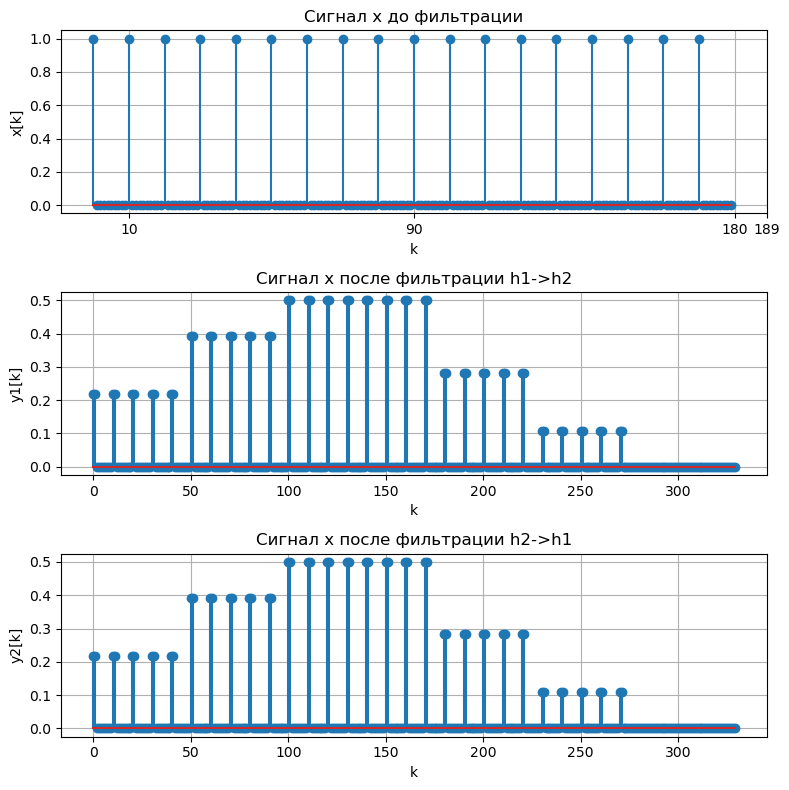

In [3]:
a = 1
b = 0.8
c = 0.5
M = 50
N = 180
k = np.arange(N)
x = np.zeros(N)
for i in range(N//10):
    x[i*10] = 1

A = a/(a+b+c)
B = b/(a+b+c)
C = c/(a+b+c)

h1 = np.zeros(3*M)
h1[0] = A
h1[M] = B
h1[2*M] = C
h2 = np.zeros(2)
h2[0] = 1/2
h2[1] = 1/2

y11=signal.convolve(x, h1)
y12=signal.convolve(x, h2)
y1=signal.convolve(y11, h2)
y2=signal.convolve(y12, h1)

plt.figure(figsize=[8, 8], dpi=100)
plt.subplot(3, 1, 1)
plt.title("Сигнал x до фильтрации")
plt.stem(k, x, use_line_collection=True)
plt.xticks([10, N/2, N, 10+N-1])
plt.grid()
plt.ylabel("x[k]")
plt.xlabel("k")

plt.subplot(3, 1, 2)
plt.title("Сигнал x после фильтрации h1->h2")
plt.stem(np.arange(y1.size), y1, use_line_collection=True)
plt.ylabel("y1[k]")
plt.xlabel("k")
plt.grid()
plt.tight_layout()

plt.subplot(3, 1, 3)
plt.title("Сигнал x после фильтрации h2->h1")
plt.stem(np.arange(y2.size), y2, use_line_collection=True)
plt.ylabel("y2[k]")
plt.xlabel("k")
plt.grid()
plt.tight_layout()

if np.array_equal(y1, y2):
    print("Ok!!!")
else:
    print("Something wrong~")

# Модуль 3. Аппроксимация идеальных частотно-избирательных фильтров и явление Гиббса

## Задача 3.1. Явление Гиббса для каузальной аппроксимации ИФНЧ

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|
|  $\nu_c$  |0.1 |0.2 |0.3 |0.1 |0.2 |0.3 |
|    $N$    | 30 | 20 | 30 | 20 | 30 | 20 |

Рассмотрите фильтр с импульсной характеристикой
$$
h[k] =
\left\{\begin{array}{l}
\dfrac{\sin(2\pi\nu_c (k-N))}{\pi (k-N)}, 0\le k \le 2N-1
\\
0, \; \text{при других } k.
\end{array}\right.
$$
для случая $\nu_c,\; N$ из варианта. 

Вычислите с помощью моделирования и постройте график АЧХ этого фильтра.  
Как изменяется АЧХ с ростом $N$ при фиксированной частоте среза $\nu_c$?

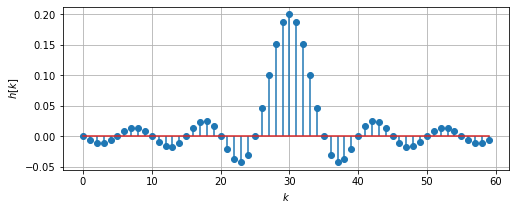

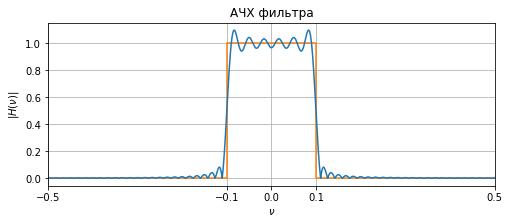

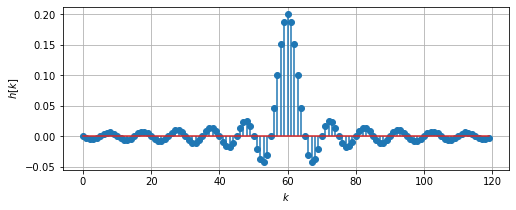

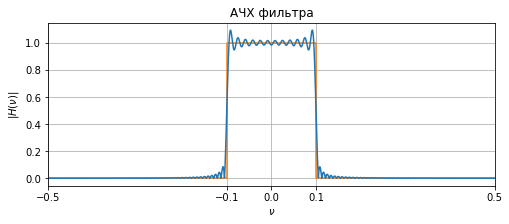

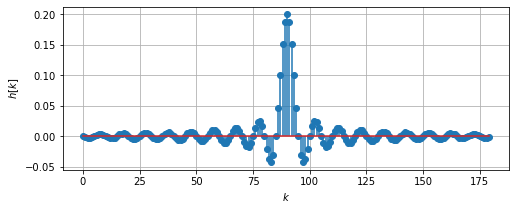

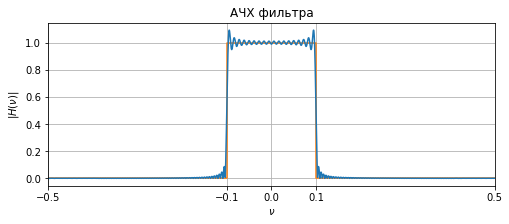

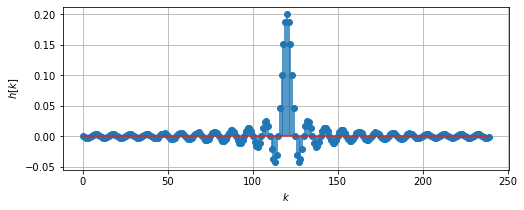

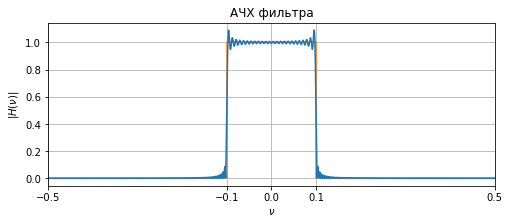

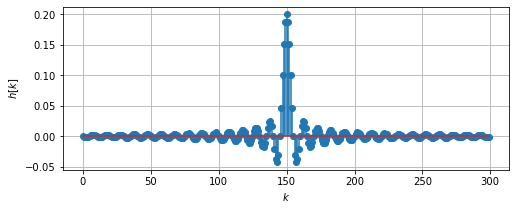

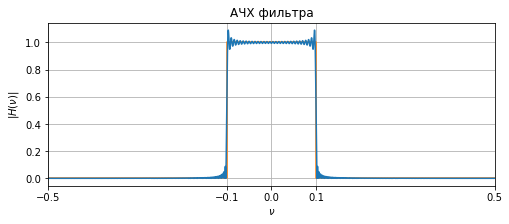

In [4]:
nu_c = 0.1
N1 = [30, 60, 90, 120, 150]
for N in N1:
    k = np.arange(2*N)
    h = np.zeros(2*N)
    for i in k:
        if i != N:
            h[i] = (np.sin(2*np.pi*nu_c*(i-N)))/(np.pi*(i-N))
        else:
            h[i] = 2*nu_c
    plt.figure(figsize=[8, 3])
    plt.stem(k, h)
    plt.xlabel("$k$")
    plt.ylabel("$h[k]$")
    plt.grid()
    plt.show()

    theta, H = signal.freqz(b=h, worN=2**12, whole=True)
    nu=theta/(2*np.pi)-0.5
    H=np.fft.fftshift(H)

    plt.figure(figsize=[8, 3])
    plt.step([-0.5, -nu_c, 0, nu_c, 0.5], [0, 0, 1, 1, 0], 'C1-')
    plt.plot(nu, abs(H))

    plt.xticks([-0.5, -nu_c, 0, nu_c, 0.5])
    plt.xlim([-0.5, 0.5])
    plt.title("АЧХ фильтра")
    plt.xlabel("$\\nu$")
    plt.ylabel("$|H(\\nu)|$")
    plt.grid()
    plt.show()

## Задача 3.2.  Аппроксимация фильтра с заданной частотной характеристикой с помощью ДВПФ   

Определить импульсную характеристику $h_{ideal}[k]$ фильтра, частотная характеристика которого является действительной функцией частоты и представлена на рисунке. 

Рассмотреть фильтр, импульсная характеристика которого в отличии от $h_{ideal}[k]$  усечена до $2N$ отсчетов и сдвинута на $N$ отсчетов вправо. С помощью моделирования определить и построить график АЧХ. Сравнить АЧХ обоих фильтров.

Рисунок генерируется с помощью функции `task_3_2(variant)` (приведенной ниже), где `variant` – номер варианта. 

In [37]:
import numpy as np
import matplotlib.pyplot as plt 
def task_3_2(variant):
    nu_c1 = [0.2, 0.15, 0.15, 0.1, 0.15, 0.15]
    amp1 = [1,  0, 0.2, 1, 1, 0.6]
    nu_c2 = [0.4, 0.35, 0.4,  0.3,  0.35,  0.4]
    amp2 = [0.4, 1, 1, 0.4, 0.7,  1]
    def H_val(nu, n):
        return amp1[n] if abs(nu)<=nu_c1[n] else amp2[n] if abs(nu)<=nu_c2[n] else 0.0
    nu=np.arange(-0.5, 0.5, 0.001)
    plt.figure(figsize=[6, 2], dpi=140)
    plt.plot(nu, [H_val(x, variant-1) for x in nu] ,'g-')
    plt.xticks([-0.5, -nu_c2[variant-1], -nu_c1[variant-1], 0, nu_c1[variant-1], nu_c2[variant-1], 0.5])
    plt.grid()
    plt.yticks([0, min(amp1[variant-1],amp2[variant-1]), 1])
    plt.xlim([-0.5, 0.5])
    plt.xlabel("Нормированнная частота, $\\nu$")
    plt.ylabel("$H(\\nu)$")
    plt.title("Вариант %i" %variant)
    plt.tight_layout()
    plt.show()

Пример вывода задания для первого варианта.

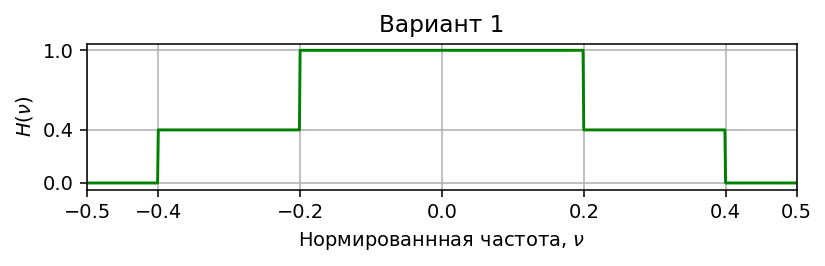

In [38]:
task_3_2(variant=1)

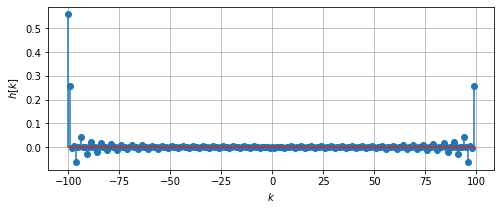

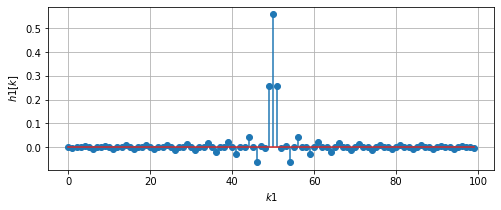

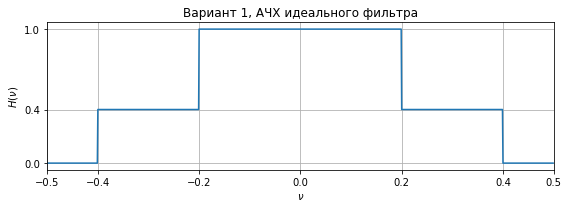

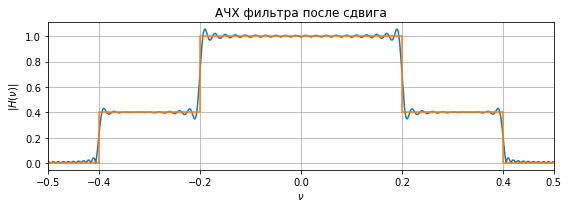

In [5]:
amp1 = 1
amp2 = 0.4
nu_c1 = 0.2
nu_c2 = 0.4
N = 50
N1 = 100
nu = np.arange(-0.5, 0.5, 0.001)
H_val = np.zeros(nu.size)
for x in nu:
    if abs(x)<=nu_c1:
        H_val[int((x+0.5)*1000)] = amp1
    elif abs(x)<=nu_c2:
        H_val[int((x+0.5)*1000)] = amp2
    else:
        H_val[int((x+0.5)*1000)] = 0.0

k = np.arange(-N1, N1, 1)
h = np.zeros(k.size)
for k1 in k:
    if k1!=0:
        h[k1] = 0.4*np.sin(2*np.pi*nu_c2*k1)/(np.pi*k1) + 0.6*np.sin(2*np.pi*nu_c1*k1)/(np.pi*k1)
    else:
        h[k1] = 0.4*2*nu_c2+0.6*2*nu_c1
plt.figure(figsize=[8, 3])
plt.stem(k, h)
plt.xlabel("$k$")
plt.ylabel("$h[k]$")
plt.grid()
plt.show()

k1 = np.arange(2*N)
h1 = np.zeros(k1.size)
for i in k1:
    h1[i] = h[i - N]
plt.figure(figsize=[8, 3])
plt.stem(k1, h1)
plt.xlabel("$k1$")
plt.ylabel("$h1[k]$")
plt.grid()
plt.show()

# h1 = np.fft.ifft(H_val, 120)
# plt.figure(figsize=[8, 3])
# plt.stem(k, h1.real)
# plt.xlabel("$k$")
# plt.ylabel("$h[k]$")
# plt.grid()
# plt.show()

plt.figure(figsize=[8, 3])
plt.plot(nu, H_val)
plt.xticks([-0.5, -nu_c2, -nu_c1, 0, nu_c1, nu_c2, 0.5])
plt.grid()
plt.yticks([0, min(amp1,amp2), 1])
plt.xlim([-0.5, 0.5])
plt.xlabel("$\\nu$")
plt.ylabel("$H(\\nu)$")
plt.title("Вариант 1, АЧХ идеального фильтра")
plt.tight_layout()
plt.show()
    
theta, H = signal.freqz(b=h1, worN=2**12, whole=True)
nu=theta/(2*np.pi)-0.5
H=np.fft.fftshift(H)

plt.figure(figsize=[8, 3])
plt.plot(nu, abs(H))
plt.xticks([-0.5, -nu_c2, -nu_c1, 0, nu_c1, nu_c2, 0.5])
plt.step([-0.5, -nu_c2, -nu_c1, 0, nu_c1, nu_c2, 0.5], [0, 0, amp2, amp1, amp1, amp2, 0], 'C1-')
plt.xlim([-0.5, 0.5])
plt.title("АЧХ фильтра после сдвига")
plt.xlabel("$\\nu$")
plt.ylabel("$|H(\\nu)|$")
plt.grid()
plt.tight_layout()
plt.show()